In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(-5)   # except last 5 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## Data Cleaning

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename columns

df.rename(columns = {'v1':'target','v2':'message'},inplace=True)
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['target'] = LE.fit_transform(df['target'])

In [10]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [11]:
df.isna().sum()

target     0
message    0
dtype: int64

In [12]:
# check duplicates

duplicate_count = df.duplicated().sum()
duplicate_count

# remove duplicates
df = df.drop_duplicates()
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

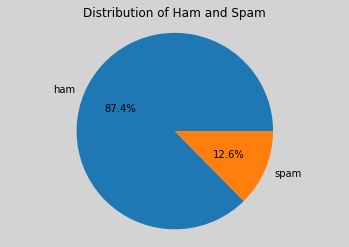

In [14]:
plt.figure(facecolor='lightgrey')
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%');

plt.title('Distribution of Ham and Spam')
plt.axis('equal')  
plt.show()

* ####  Data is imbalanced

In [15]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['no_of_characters'] = df['message'].apply(len)   # message length

In [17]:
df.head()

,target,message,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# No of words
df['no_of_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))  # word division 

In [19]:
df

,target,message,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [20]:
df['no_of_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,message,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
# for ham
df[df['target'] == 0][['no_of_characters','no_of_words','no_of_sentences']].describe() 

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
## for spam
df[df['target'] == 1][['no_of_characters','no_of_words','no_of_sentences']].describe() 

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


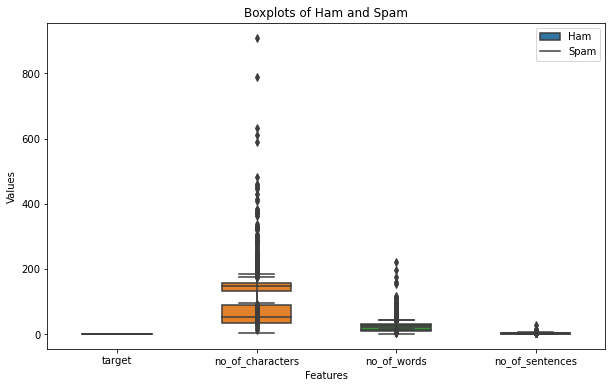

In [25]:
ham_data = df[df['target'] == 0]
spam_data = df[df['target'] == 1]

# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=ham_data, width=0.5)
sns.boxplot(data=spam_data, width=0.5)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Ham and Spam')
plt.legend(labels=['Ham', 'Spam'])
plt.show()

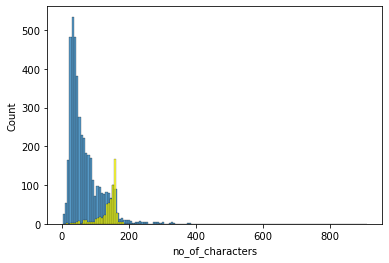

In [26]:
sns.histplot(df[df['target'] == 0]['no_of_characters'])
sns.histplot(df[df['target'] == 1]['no_of_characters'],color='yellow');

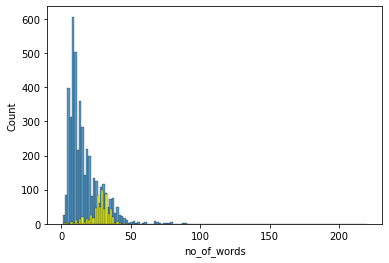

In [27]:
sns.histplot(df[df['target'] == 0]['no_of_words'])
sns.histplot(df[df['target'] == 1]['no_of_words'],color='yellow');

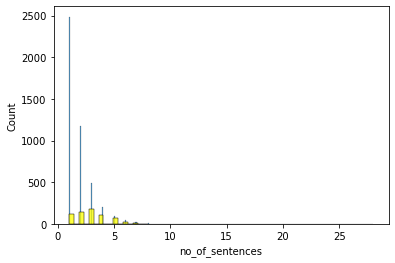

In [28]:
sns.histplot(df[df['target'] == 0]['no_of_sentences'])
sns.histplot(df[df['target'] == 1]['no_of_sentences'],color='yellow');

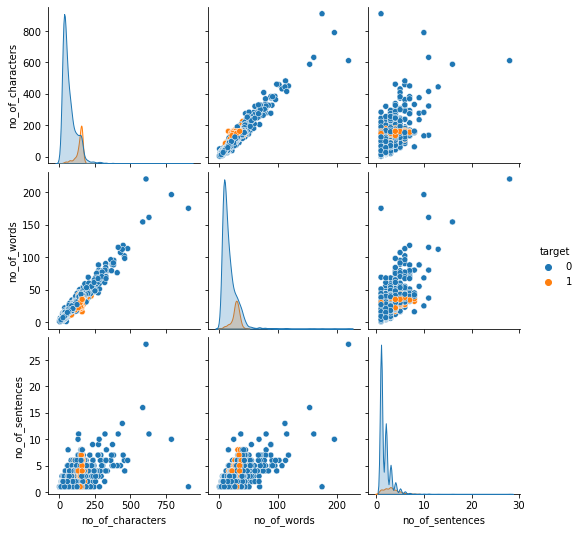

In [29]:
sns.pairplot(df,hue='target');

In [30]:
df_corr = df.corr()
df_corr

,target,no_of_characters,no_of_words,no_of_sentences
target,1.000000,0.384717,0.262984,0.284901
no_of_characters,0.384717,1.000000,0.965770,0.638143
no_of_words,0.262984,0.965770,1.000000,0.684541
no_of_sentences,0.284901,0.638143,0.684541,1.000000


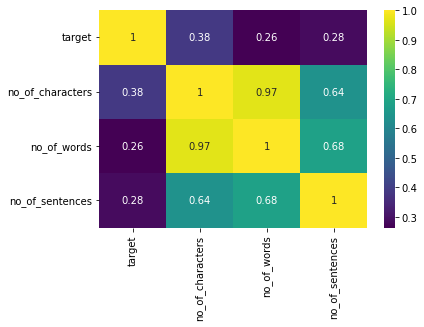

In [31]:
sns.heatmap(df_corr,annot=True,cmap='viridis');

## Data Preprocessing

In [32]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_message(mess):
    message  = mess.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():          # remove special characters
            y.append(i)
            
    message = y[:]
    y.clear()
    
     
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
df['transformed_mess'] = df['message'].apply(transform_message)

In [34]:
df.head()

,target,message,no_of_characters,no_of_words,no_of_sentences,transformed_mess
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_mess'].tolist():
    for w in msg.split():
        spam_corpus.append(w)

In [36]:
spam_corpus,len(spam_corpus)

(['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'appli',
  '08452810075over18',
  'freemsg',
  'hey',
  'darl',
  '3',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv',
  'winner',
  'valu',
  'network',
  'custom',
  'select',
  'receivea',
  'prize',
  'reward',
  'claim',
  'call',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hour',
  'mobil',
  '11',
  'month',
  'u',
  'r',
  'entitl',
  'updat',
  'latest',
  'colour',
  'mobil',
  'camera',
  'free',
  'call',
  'mobil',
  'updat',
  'co',
  'free',
  '08002986030',
  'six',
  'chanc',
  'win',
  'cash',
  '100',
  'pound',
  'txt',
  'csh11',
  'send',
  'cost',
  '6day',
  'tsandc',
  'appli',
  'repli',
  'hl',
  '4',
  'info',
  'urgent',
  '1',
  'week',
  'free',
  'membership',

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

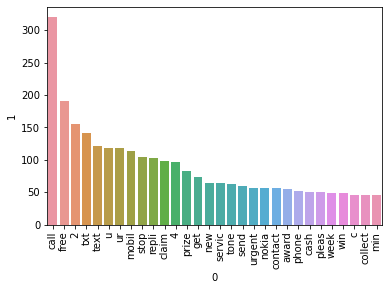

In [37]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 90 )

In [38]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_mess'].tolist():
    for w in msg.split():
        ham_corpus.append(w)

In [39]:
ham_corpus,len(ham_corpus)

(['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat',
  'ok',
  'lar',
  'joke',
  'wif',
  'u',
  'oni',
  'u',
  'dun',
  'say',
  'earli',
  'hor',
  'u',
  'c',
  'alreadi',
  'say',
  'nah',
  'think',
  'goe',
  'usf',
  'live',
  'around',
  'though',
  'even',
  'brother',
  'like',
  'speak',
  'treat',
  'like',
  'aid',
  'patent',
  'per',
  'request',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  '9',
  'copi',
  'friend',
  'callertun',
  'gon',
  'na',
  'home',
  'soon',
  'want',
  'talk',
  'stuff',
  'anymor',
  'tonight',
  'k',
  'cri',
  'enough',
  'today',
  'search',
  'right',
  'word',
  'thank',
  'breather',
  'promis',
  'wont',
  'take',
  'help',
  'grant',
  'fulfil',
  'promis',
  'wonder',
  'bless',
  'time',
  'date',
  'sunday',
  'oh',
  'k',
  'watch',
  'eh',
  'u',
  'rememb',


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

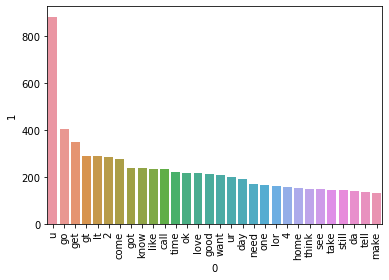

In [40]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 90 )

## Model Building

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
x = tfidf.fit_transform(df['transformed_mess']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
x.shape

(5169, 3000)

In [67]:
y = df['target']
y.values

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### Gaussian NB

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


### Multinomial NB

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


### Bernoulli NB

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [72]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnb.pkl','wb'))